In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kagglexchallenge/train.csv
/kaggle/input/kagglexchallenge/test.csv


## Importing libraries

In [194]:
import warnings

warnings.filterwarnings("ignore")

In [195]:
from IPython.display import FileLink


In [196]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [197]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
train_dir = "/kaggle/input/kagglexchallenge/train.csv"
test_dir = "/kaggle/input/kagglexchallenge/test.csv"

# Test data preparation

In [200]:
test = pd.read_csv(test_dir)

test_ids = test['id']
test = test.drop(columns=['id'], axis = 1)

# Read and Explore Data

In [201]:
df = pd.read_csv(train_dir)

In [202]:
test.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [203]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [205]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [206]:
df.shape

(54273, 13)

# Data Wrangling

### Finding null values

In [207]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

## Handling each column

### Manual Categorical encoding for 'accident' column

In [208]:
accident_category_mapping = {
    'None reported': 1,
    'At least 1 accident or damage reported': -1
}


df['accident'] = df['accident'].map(accident_category_mapping)
test['accident'] = test['accident'].map(accident_category_mapping)

In [209]:
df['accident']

0        1
1        1
2        1
3        1
4        1
        ..
54268    1
54269   -1
54270   -1
54271    1
54272    1
Name: accident, Length: 54273, dtype: int64

In [210]:
object_cols = [col for col in df.columns if df[col].dtypes == 'object']
object_cols

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'clean_title']

#### Changing data of fuel_type '-' and 'not supported' to 'other'

In [211]:
df['fuel_type'] = df['fuel_type'].apply(lambda x: 'other' if x in ['–', 'not supported'] else x)

In [212]:
test['fuel_type'] = test['fuel_type'].apply(lambda x: 'other' if x in ['–', 'not supported'] else x)

### Finding unique values of each column

In [213]:
def unique_val_of_each_col(df, columns):
    
    table = {}
    
    for col in columns:
        table[col] = [df[col].nunique(), list(df[col].unique())]
        
    return table

In [214]:
object_cols

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'clean_title']

In [215]:
table = unique_val_of_each_col(df, object_cols)
print(table['fuel_type'])

[6, ['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', 'other', 'Plug-In Hybrid']]


In [216]:
for key, unq_val in table.items():
    print(f'{key}:  {unq_val[0]}')

brand:  53
model:  1827
fuel_type:  6
engine:  1061
transmission:  46
ext_col:  260
int_col:  124
clean_title:  1


## Changing values to categorical values

In [217]:
lbl_enc = LabelEncoder()    

def obj_to_categorical(df, columns):
    for col in columns:
        df[col] = lbl_enc.fit_transform(df[col])
        
    return df

In [218]:
df = obj_to_categorical(df, object_cols)

In [219]:
test = obj_to_categorical(test, object_cols)

In [220]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,14,644,2018,74349,2,719,2,26,57,1,0,11000
1,1,4,49,2007,80000,2,534,18,17,9,1,0,8250
2,2,21,1771,2009,91491,2,541,14,181,6,1,0,15000
3,3,4,1748,2022,2437,3,646,43,100,24,1,0,63500
4,4,40,693,2001,111000,2,219,34,249,9,1,0,7850


#### 

### Dropping unnecessary columns

In [221]:
cols_to_drop = ['id', 'clean_title', 'model']

In [222]:
df.drop(cols_to_drop, axis = 1, inplace = True)

In [223]:
test.drop(cols_to_drop[1:], axis = 1, inplace = True)

### Preparing data for model

In [224]:
X = df.drop(columns = ['price'])
y = df['price']

In [225]:
X.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident
0,14,2018,74349,2,719,2,26,57,1
1,4,2007,80000,2,534,18,17,9,1
2,21,2009,91491,2,541,14,181,6,1
3,4,2022,2437,3,646,43,100,24,1
4,40,2001,111000,2,219,34,249,9,1


## Applying PCA (Principal Component Analysis)

In [226]:

# def apply_PCA(X):
#     pca = decomposition.PCA(n_components = X.shape[1])

#     pca.fit(X)

#     X = pca.fit_transform(X)
    
#     return X

In [227]:
# X = apply_PCA(X)

# test = apply_PCA(test)

## Train Test Split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Solving Outliers issue

In [229]:
from scipy.stats import zscore

In [230]:
numerical_columns = ['milage']

In [231]:
z_scores = np.abs(zscore(X_train[numerical_columns]))
thresh = 3

### Removing outliers

In [232]:
# X_train = X_train[(z_scores < thresh).all(axis=1)]

### Replacing outliers with mean value

In [233]:
# # Replace outliers with the mean value of the column
# for col in numerical_columns:
#     mean_value = X_train[col].mean()
#     X_train[col] = np.where(z_scores > threshold, mean_value, X_train[col])

###  Replacing outliers with median value

In [234]:
# # Replace outliers with the mean value of the column
# for col in numerical_columns:
#     median_value = X_train[col].median()
#     X_train[col] = np.where(z_scores > threshold, median_value, X_train[col])

### Replacing outliers with mode value

In [235]:
# # Replace outliers with the mean value of the column
# for col in numerical_columns:
#     mode_value = X_train[col].mode()
#     X_train[col] = np.where(z_scores > threshold, mode_value, X_train[col])

# Advanced feature engineering

In [236]:
import seaborn as sns

<Axes: >

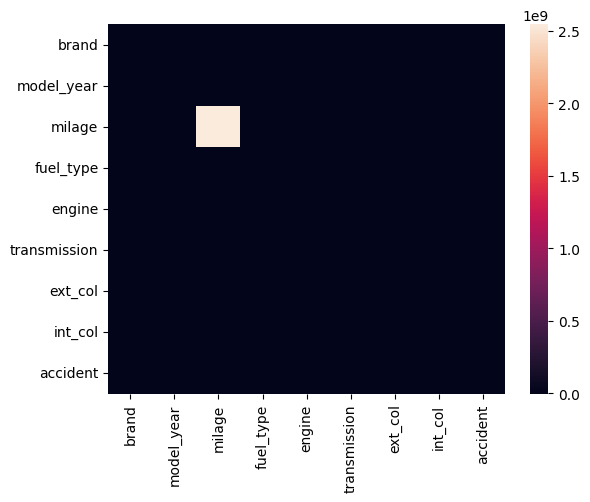

In [237]:
sns.heatmap(X_train.cov())

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Deep copy of original data

In [239]:
X_train_prep = X_train.copy(deep = True)
X_test_prep = X_test.copy(deep = True)

#### Dropping milage column

In [240]:
X_train_prep.drop('milage', axis = 1, inplace = True)
X_test_prep.drop('milage', axis = 1, inplace = True)

#### Bivariate combinations of our predicting variables

In [241]:
from itertools import combinations

columns_list = X_train_prep.columns

interactions = list(combinations(columns_list, 2))
interactions[:5]

[('brand', 'model_year'),
 ('brand', 'fuel_type'),
 ('brand', 'engine'),
 ('brand', 'transmission'),
 ('brand', 'ext_col')]

We will add each combination to a dictionary, and then index the respective dictionary items as arguments in an iterative linear regression

In [242]:
interaction_dict = {}

for interaction in interactions:
    X_train_int = X_train_prep.copy(deep = True)
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    
    lr2 = LinearRegression()
    lr2.fit(X_train_int, y_train)
   
    score = lr2.score(X_train_int, y_train)

    interaction_dict[score] = interaction

In [243]:
# # Example dictionary
# example_dict = {3: 'c', 1: 'a', 2: 'b'}

# # Sort dictionary by key
# sorted_dict = dict(sorted(example_dict.items(), reverse = True))

# # Display the sorted dictionary
# print("Sorted Dictionary by Key:", sorted_dict)
# print("Example Dictionary:", example_dict)

In [244]:
sorted_interactions = dict(sorted(interaction_dict.items(), reverse = True))

In [245]:
# sorted_interactions

The first five interactions

In [246]:
top_5 = list(sorted_interactions.values())[:5]
top_5

[('model_year', 'engine'),
 ('engine', 'accident'),
 ('model_year', 'accident'),
 ('model_year', 'ext_col')]

#### Adding column to train

In [247]:
def add_col(df, int_list):
    df_int = df.copy(deep = True)
    
    for interaction in int_list:
        df_int[f'{interaction[0]}___{interaction[1]}'] = df_int[interaction[0]] *  df_int[interaction[1]]
        
    return df_int

In [248]:
X_train_prep_new = add_col(X_train_prep, top_5)
X_test_prep_new = add_col(X_test_prep, top_5)

In [249]:
X_train_prep_new.head()

,brand,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,model_year___engine,engine___accident,model_year___accident,model_year___ext_col
21234,50,2016,2,398,8,249,6,1,802368,398,2016,501984
49993,50,2012,2,13,40,188,57,-1,26156,-13,-2012,378256
47016,26,2015,2,473,43,212,9,-1,953095,-473,-2015,427180
28922,14,2019,2,514,3,249,77,1,1037766,514,2019,502731
22726,35,2012,2,223,21,249,6,1,448676,223,2012,500988


#### Scaling data

In [250]:
scl = StandardScaler()

In [251]:
X_train_prep = scl.fit_transform(X_train_prep)
X_test_prep = scl.transform(X_test_prep)

In [252]:
lr = LinearRegression()


# lr.fit(X_train_prep, y_train)
lr.fit(X_train_prep_new, y_train)

# y_hat_train = lr.predict(X_train_prep)
y_hat_train = lr.predict(X_train_prep_new)

r2_score(y_train, y_hat_train)

0.07173915257717534

#### Adding the new data to actual training data

In [253]:
X_train = add_col(X_train, top_5)
X_test = add_col(X_test, top_5)
test = add_col(test, top_5)

# Returning to actual data

In [254]:
X_train.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,model_year___engine,engine___accident,model_year___accident,model_year___ext_col
21234,50,2016,163000,2,398,8,249,6,1,802368,398,2016,501984
49993,50,2012,153818,2,13,40,188,57,-1,26156,-13,-2012,378256
47016,26,2015,66690,2,473,43,212,9,-1,953095,-473,-2015,427180
28922,14,2019,85253,2,514,3,249,77,1,1037766,514,2019,502731
22726,35,2012,90000,2,223,21,249,6,1,448676,223,2012,500988


In [255]:
X_train.shape

(43418, 13)

## Creation of new data

In [256]:
# from imblearn.over_sampling import SMOTE

# # Assuming X_train and y_train are your existing data
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [257]:
X_train.shape

(43418, 13)

### Scaling the values

#### Normalizer

In [258]:
# scaler = Normalizer(norm='l2')

#### Standard Scaler

In [259]:
scaler = StandardScaler()


#### Min-Max Scaler

In [260]:
# scaler = MinMaxScaler()


In [261]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# for test data
test = scaler.fit_transform(test)

In [262]:
X_train[:5]

array([[ 1.96451378,  0.16621217,  1.78517996,  0.02656747, -0.63733036,
        -1.65046694,  1.28017348, -0.58851105,  0.60113606, -0.63643507,
         0.16876462,  0.60124957,  1.2815391 ],
       [ 1.96451378, -0.54874512,  1.60313335,  0.02656747, -2.10225385,
         1.17508511,  0.65385072,  1.08492601, -1.66351691, -2.09974129,
        -0.58792491, -1.66290789,  0.65103884],
       [ 0.3440528 , -0.01252715, -0.12430697,  0.02656747, -0.35195565,
         1.43998062,  0.90027279, -0.49007358, -1.66351691, -0.35228621,
        -1.43482803, -1.6645942 ,  0.90034857],
       [-0.46617769,  0.70243014,  0.24373172,  0.02656747, -0.19595081,
        -2.09195944,  1.28017348,  1.74117583,  0.60113606, -0.19266539,
         0.3823315 ,  0.60293588,  1.2853457 ],
       [ 0.95172567, -0.54874512,  0.33784795,  0.02656747, -1.30320467,
        -0.50258642,  1.28017348, -0.58851105,  0.60113606, -1.30321129,
        -0.15342678,  0.59900115,  1.27646362]])

In [263]:
test[:5]

array([[ 0.93853968, -0.19035668,  0.01026798,  0.0216051 , -0.04373974,
         0.64698502,  1.30254639, -0.57181809,  0.60030446, -0.04565634,
         0.45793026,  0.59929458,  1.30135372],
       [ 0.3789559 , -0.01144207,  1.0954064 ,  0.0216051 , -0.56351527,
         0.01375803,  0.9128245 , -0.49771688,  0.60030446, -0.56346449,
         0.20696965,  0.59985705,  0.91290167],
       [ 0.93853968, -0.01144207, -0.40415188,  0.0216051 , -0.94752854,
        -0.52900796, -0.9885459 ,  3.09619155,  0.60030446, -0.94679655,
         0.02155845,  0.59985705, -0.98856453],
       [ 0.30900793,  0.52530177, -0.8474788 ,  0.0216051 ,  1.37982459,
         1.46113401,  1.30254639,  3.09619155, -1.66582138,  1.38167983,
        -2.26705252, -1.66859885,  1.30651159],
       [-1.15989951,  0.883131  ,  0.34547937,  0.0216051 ,  0.30148431,
         0.01375803,  1.30254639, -0.49771688, -1.66582138,  0.30608256,
        -1.74640289, -1.6697238 ,  1.30909052]])

# Building the deep learning models for price prediction

## Deep Learning Model 1

In [264]:
# # Build the model
# model = Sequential()

# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.2))  # Adding Dropout for regularization

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))  # Adding Dropout for regularization

# model.add(Dense(1, activation='linear'))

# Deep Learning Model 2

In [265]:
# Build the model
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Adding Dropout for regularization

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Adding Dropout for regularization

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

### Model Visualization

In [266]:
plot_model(model, "model1.png", show_layer_activations=True)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,017 (336.00 KB)

 Trainable params: 84,737 (331.00 KB)

 Non-trainable params: 1,280 (5.00 KB)

### Compile Model

In [267]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError()
metrics = ['mae']

In [268]:
model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

In [269]:
epochs = 100
batch_size = 32
validation_split = 0.2

In [270]:
# history = model.fit(X_train, y_train, 
#                     epochs=epochs, 
#                     batch_size=batch_size, 
#                     validation_split=validation_split)

In [271]:
# loss, mae = model.evaluate(X_test, y_test)
# # print(f"Mean Absolute Error on Test Set: {mae}")

In [272]:
# # Making predictions
# y_pred = model.predict(X_test)

In [273]:
def plot_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
    

    # Plot training & validation MAE values
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
    

# Machine Learning Models

### XGBoost

In [274]:
import xgboost as xgb
ml_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                            max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)

### Random Forest

In [275]:
# from sklearn.ensemble import RandomForestRegressor
# ml_model = RandomForestRegressor(n_estimators=100, random_state=42)

### Support Vector Regressor (SVR)

In [276]:
# from sklearn.svm import SVR

# # Initialize the SVR model
# ml_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

### Gradient Boosting Machines (GBM)

In [277]:
# from sklearn.ensemble import GradientBoostingRegressor

# # Initialize the Gradient Boosting Regressor model
# ml_model = GradientBoostingRegressor(n_estimators=100, 
#                                      learning_rate=0.1, 
#                                      max_depth=3, 
#                                      random_state=42)

### Training the model

In [278]:
ml_model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

## Making predictions

In [279]:
y_pred = ml_model.predict(X_test)

### Model Evaluation

In [280]:
def evaluate_regression(actual, predicted):
    """
    Evaluates the performance of a regression model.

    Parameters:
    actual (array-like): Actual values.
    predicted (array-like): Predicted values.

    Returns:
    dict: A dictionary containing the evaluation metrics.
    """
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    
    evaluation_metrics = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'R-squared (R2)': r2
    }
    
    return evaluation_metrics

In [281]:
metrics = evaluate_regression(y_test, y_pred)

metrics

{'Mean Absolute Error (MAE)': 16474.853406052698,
 'Mean Squared Error (MSE)': 2289585837.573964,
 'Root Mean Squared Error (RMSE)': 47849.61690101567,
 'R-squared (R2)': 0.2208319233262307}

In [282]:
metrics_df = pd.DataFrame(metrics.values(), index = metrics.keys())
metrics_df.T

,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2)
0,16474.853406,2.289586e+09,47849.616901,0.220832


### Only for deep learning models

In [283]:
# plot_history(history)

# Submission

In [284]:
price = model.predict(test)

price[:10]

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[ 0.12426253],
       [ 0.05486383],
       [ 0.10049111],
       [-0.14883797],
       [ 0.08871372],
       [ 0.13239163],
       [ 0.06808139],
       [ 0.1679404 ],
       [ 0.15415977],
       [ 0.05319551]], dtype=float32)

In [285]:
import itertools

price = list(itertools.chain(*price))

In [286]:
submission_df = pd.DataFrame({
    'id': test_ids,
    'price': price
})

In [287]:
submission_df

,id,price
0,54273,0.124263
1,54274,0.054864
2,54275,0.100491
3,54276,-0.148838
4,54277,0.088714
...,...,...
36178,90451,0.139991
36179,90452,0.113872
36180,90453,0.161528
36181,90454,0.089480


In [288]:
submission_df.to_csv('submission.csv', index=False)

# Use Kaggle's file download feature
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv